In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [38]:
def ragged_csv(filename):
    f=open(filename)
    max_n=0
    for line in f.readlines():
        words = len(line.split('\t'))
        if words > max_n:
            max_n=words
    lines=pd.read_table(filename,sep='\t', names=range(max_n))
    return lines

In [39]:
ragged_csv('file1.txt')

,0,1,2,3,4,5,6,7,8,9,...,811,812,813,814,815,816,817,818,819,820
0,!Series_title,Patterns of Population Epigenomic Diversity in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,!Series_geo_accession,GSE43857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,!Series_status,Public on Mar 05 2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,!Series_submission_date,Jan 29 2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,!Series_last_update_date,May 29 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,!Sample_relation,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...
78,!Sample_supplementary_file_1,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1085...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1085...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1085...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1085...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1085...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1085...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1085...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1085...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1085...,...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2099...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2099...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2099...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2099...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2099...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2099...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2099...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2099...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2099...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2099...
79,!series_matrix_table_begin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,ID_REF,GSM1085191,GSM1085192,GSM1085193,GSM1085194,GSM1085195,GSM1085196,GSM1085197,GSM1085198,GSM1085199,...,GSM2099771,GSM2099772,GSM2099773,GSM2099774,GSM2099775,GSM2099776,GSM2099777,GSM2099778,GSM2099779,GSM2099780


In [34]:
pd.read_table('https://ftp.ncbi.nlm.nih.gov/geo/series/GSE43nnn/GSE43857/matrix/GSE43857-GPL11221_series_matrix.txt.gz')

ParserError: Error tokenizing data. C error: Expected 2 fields in line 42, saw 821


In [25]:
def getAge(geo_file_name):
    df = pd.read_csv(geo_file_name)
    df = df.loc[df['!Series_title'] == '!Sample_characteristics_ch1']
    df = df.dropna(axis=1)
    df = df.transpose()

    ageIndex = []
    for column in df:
        if df[column].str.contains('\Aage').any() == True or df[column].str.contains(' age ').any() == True or df[column].str.contains('age:').any() == True or df[column].str.contains('_age').any() == True or df[column].str.contains('_age_').any() == True:
            ageIndex.append(column)

    df = df.iloc[1: , :]

    # print(ageIndex)
    ageList = []
    df3 = pd.DataFrame(ageList)
    for ele in ageIndex:
        ageList = []
        df2 = pd.DataFrame(df[ele]).reset_index(drop=True)
        for num in df2[ele]:
            findDay = re.findall(r'(\d+.\d+) days|(\d+.\d+) day|(\d+) days|(\d+) day|days[,:() ]*(\d+[.]?\d+)|day[,:() ]*(\d+[.]?\d+)', num)
            findYear = re.findall(r'(\d+.\d+) years|(\d+.\d+) year|(\d+.\d+) yrs|(\d+.\d+) yr|(\d+) years|(\d+) years|(\d+) yrs|(\d+) yr|yr[,:() ]*(\d+[.]?\d+)|years[,:() ]*(\d+[.]?\d+)|yrs[,:() ]*(\d+[.]?\d+)|age: (\d+)$|age:(\d+.\d+)$', num)
            findMonth = re.findall(r'(\d+.\d+) months|(\d+.\d+) month|(\d+.\d+) mths|(\d+.\d+) mth|(\d+) months|(\d+) month|(\d+) mths|(\d+) mth|(\d+)[-]*month|(\d+)[-]*months|(\d+.\d+)[-]*month|(\d+.\d+)[-]*months', num)
            findWeek = re.findall(r'(\d+.\d+) weeks|(\d+.\d+) week|(\d+) weeks|(\d+) week', num)
            findHour = re.findall(r'(\d+.\d+) hours|(\d+.\d+) hour|(\d+.\d+) hrs|(\d+.\d+)hr|(\d+) hours|(\d+) hour|(\d+) hrs|(\d+) hr', num)
            yearList = []
            year = 0
            if len(findYear) != 0:
                findYear_input = findYear[0]
                yearList = [x for x in findYear_input if x != '']
                yearList = [float(i) for i in yearList]
                year = yearList[0]  
            ageList.append(year)


            dayList = []
            day = 0
            if len(findDay) != 0:
                findDay_input = findDay[0]
                dayList = [x for x in findDay_input if x != '']
                dayList = [float(i) for i in dayList]
                day = dayList[0]

            dayToYear = day/365

            monthList = []
            month = 0
            if len(findMonth) != 0:
                findMonth_input = findMonth[0]
                monthList = [x for x in findMonth_input if x != '']
                monthList = [float(i) for i in monthList]
                month = monthList[0]

            monthToYear = month/12

            weekList = []
            week = 0
            if len(findWeek) != 0:
                findWeek_input = findWeek[0]
                weekList = [x for x in findWeek_input if x != '']
                weekList = [float(i) for i in weekList]
                week = weekList[0]

            weekToYear = week/52.143

            hourList = []
            hour = 0
            if len(findHour) != 0:
                findHour_input = findHour[0]
                hourList = [x for x in findHour_input if x != '']
                hourList = [float(i) for i in hourList]
                hour = hourList[0]

            hourToYear = hour/8760

            totalAge = dayToYear + year + monthToYear + weekToYear + hourToYear
            ageList.append(totalAge)

            df3 = pd.DataFrame(ageList)
        
    

    sns.set_theme(style="darkgrid")
    sns.countplot(x=0, data=df3)
    plt.show()
    

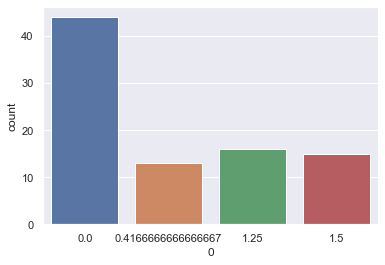

In [26]:
df = getAge('geneFile3.csv')
